# NATS3200: Practical 5 (Logistic regression and decision trees, weeks 6 and 7)

### Brexit

On June 23rd, 2016, The UK had a national referendum to decide whether the country should leave the
EU (‘Brexit’). The result, a win for the Leave campaign, surprised many political commentators, who had
expected that people would vote to Remain. Immediately people began to look for patterns that coud explain
the Leave vote: cities had generally voted to Remain, while small towns had voted to Leave. England and
Wales voted to Leave, while Northern Ireland and especially Scotland voted to Remain.

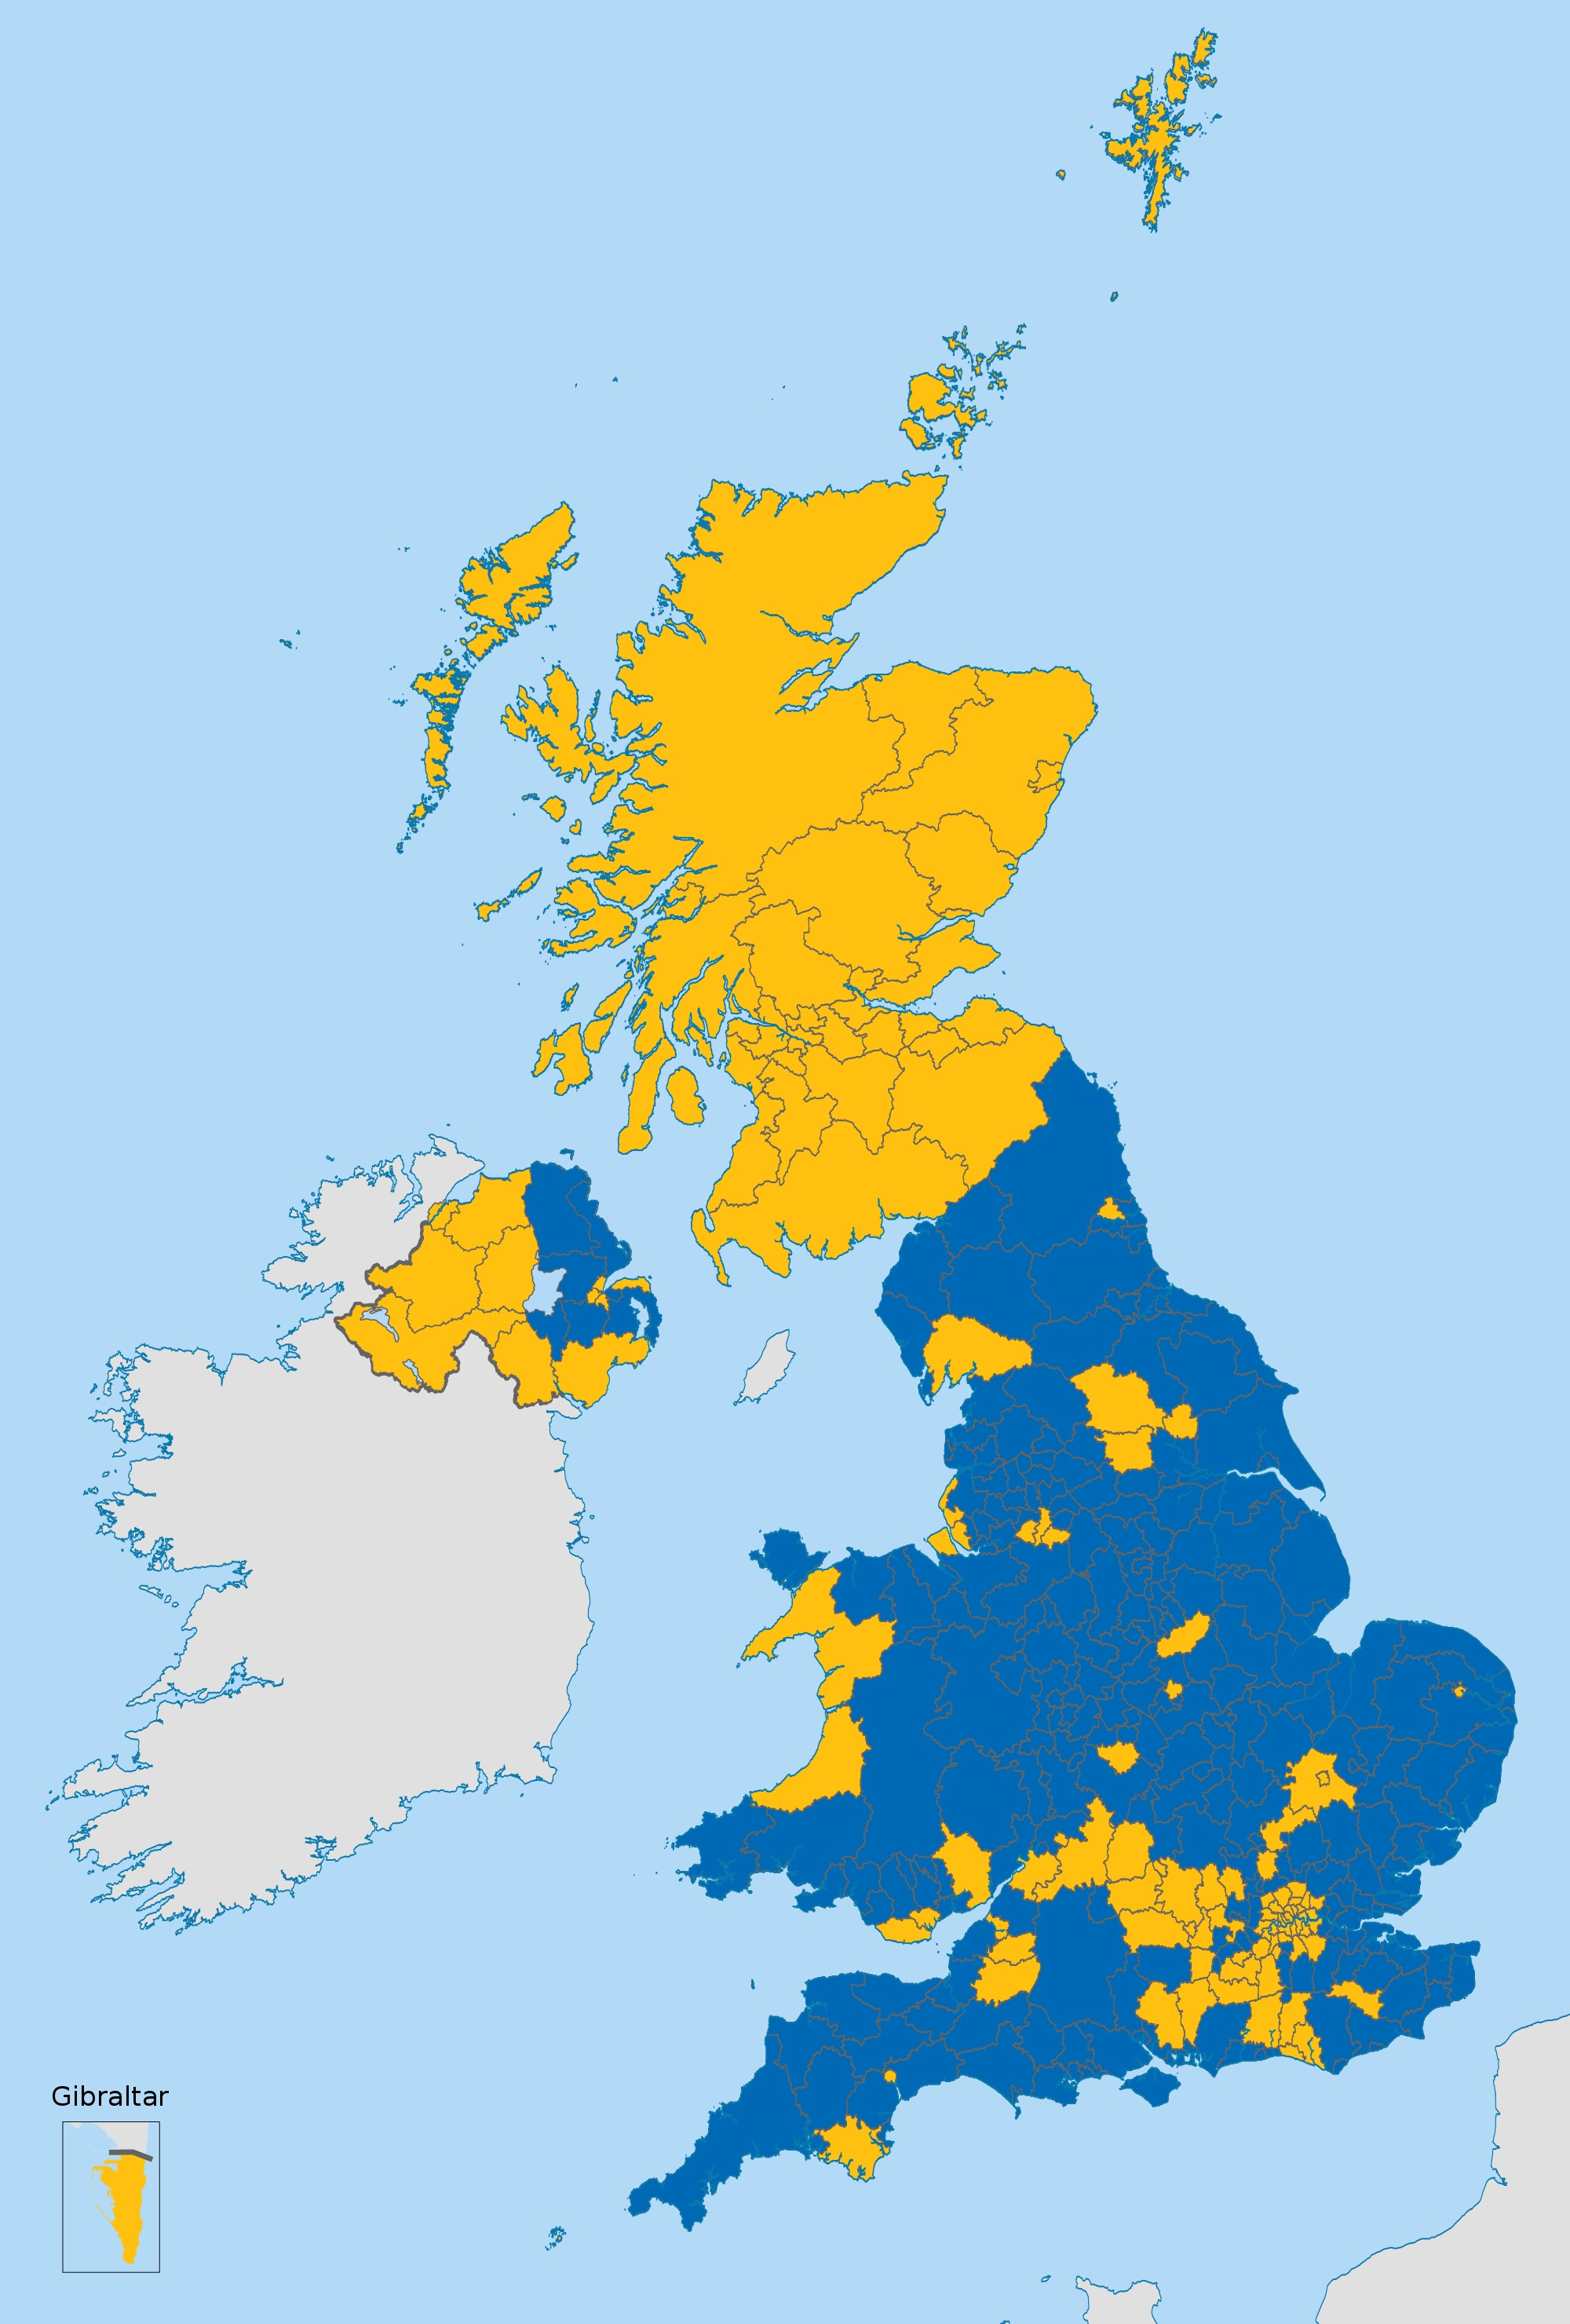
Figure 1: EU referendum vote by electoral ward. Yellow indicates Remain, blue indicates Leave

In the next few days, the Guardian newspaper presented some apparent demographic trends in the vote, based
on the ages, incomes, education and class of different electoral wards 
(https://www.theguardian.com/politics/ng-interactive/2016/jun/23/eu-referendum-live-results-and-analysis). The Guardian’s analysis stopped at
showing these results graphically, and commenting on the apparent patterns. We will go one better by doing
some real statistical analysis of the data.

I have scraped the data from the Guardian’s plots into a data file (brexit.csv) which you can download from
MINERVA

There are 6 attributes in the data. The 5 possible input variables are:

* abc1: proportion of individuals who are in the ABC1 social classes (middle to upper class)
* medianIncome: the median income of all residents
* medianAge: median age of residents
* withHigherEd: proportion of residents with any university-level education
* notBornUK: the proportion of residents who were born outside the UK

These are normalised so that the lowest value is zero and the highest value is one.
The output variable is called voteBrexit, and gives a TRUE/FALSE answer to the question ‘did this electoral
ward vote for Brexit?’ (i.e. did more than 50% of people vote to Leave?).

Tasks (week 6):

1. Fit a logistic regression models using all of the available inputs. Identify the direction of each effect
from the fitted coefficients. Compare these with the plots shown on the Guardian website. Do they
agree? Explain. (1.5 mark)
2. Present the value of each coefficient estimate and calculate the 95% confidence interval. Which input would you
say has the strongest effect and why? (0.5 mark) 
3. Using aic, perform a model selection to determine which factors are useful to predict the result of
the vote. You can use a ‘greedy’ input selection procedure, as follows: (i) select the best model with 1 input;
(ii) fixing that input, select the best two-input model (i.e. try all the other 4 inputs with the one you
selected first); (iii) select the best three-input model containing the first two inputs you chose, etc. At
each stage evaluate the quality of fit using aic and stop if this gets worse. (2 marks)

Tasks (week 7):

4. Use the Scikit-Learn package to create a decision tree classification model. Visualise your model and intepret
the fitted model. (1 mark)
5. Compare your decision tree model and your logistic regression model. Do they attribute high importance
to the same factors? How do you intepret each model to explain the referendum vote? (1 mark)
6. Which model would you use if you were explaining the results for a newspaper article, and why? (1 mark)

7.	Quality of presentation of report in Jupyter notebook (2 mark)
8.	Bonus point: Justify why your work/report goes beyond just completing the tasks and deserves an extra mark (1 mark) 

**Submission of work:** 
-	The work must be submitted as an ipynb on minerva
-	The filename must be Surname-problem6and7.ipynb
-	The self-assessment must be added at the end of the ipynb. Mark each task above.
-	Declaration of integrity (That the work you submitted is yours, and that you marked it fairly)

**Deadline:** 18th March 2025, 5pm

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**1. Fit a logistic regression models using all of the available inputs. Identify the direction of each effect
from the fitted coefficients. Compare these with the plots shown on the Guardian website. Do they
agree? Explain. (1.5 mark)**

In [5]:
df = pd.read_csv('brexit.csv')
df

,abc1,notBornUK,medianIncome,medianAge,withHigherEd,voteBrexit
0,0.133641,0.012605,0.252577,0.500000,0.085526,True
1,0.129032,0.113445,0.108247,0.272727,0.111842,True
2,0.161290,0.004202,0.128866,0.636364,0.118421,True
3,0.322581,0.046218,0.226804,0.454545,0.217105,True
4,0.345622,0.058824,0.201031,0.545455,0.243421,True
...,...,...,...,...,...,...
339,0.000000,0.000000,0.139175,0.545455,0.026316,True
340,0.216590,0.012605,0.237113,0.545455,0.157895,True
341,0.516129,0.042017,0.371134,0.772727,0.480263,False
342,0.258065,0.037815,0.139175,0.818182,0.309211,True


In [6]:
# Convert TRUE/FASLE into 0/1
df['voteBrexit'] = df['voteBrexit'].astype(int)
df

,abc1,notBornUK,medianIncome,medianAge,withHigherEd,voteBrexit
0,0.133641,0.012605,0.252577,0.500000,0.085526,1
1,0.129032,0.113445,0.108247,0.272727,0.111842,1
2,0.161290,0.004202,0.128866,0.636364,0.118421,1
3,0.322581,0.046218,0.226804,0.454545,0.217105,1
4,0.345622,0.058824,0.201031,0.545455,0.243421,1
...,...,...,...,...,...,...
339,0.000000,0.000000,0.139175,0.545455,0.026316,1
340,0.216590,0.012605,0.237113,0.545455,0.157895,1
341,0.516129,0.042017,0.371134,0.772727,0.480263,0
342,0.258065,0.037815,0.139175,0.818182,0.309211,1


In [7]:
abc1 = df.abc1
notBornUK= df.notBornUK
medianIncome = df.medianIncome
medianAge = df.medianAge
withHigherEd = df.withHigherEd
voteBrexit = df.voteBrexit

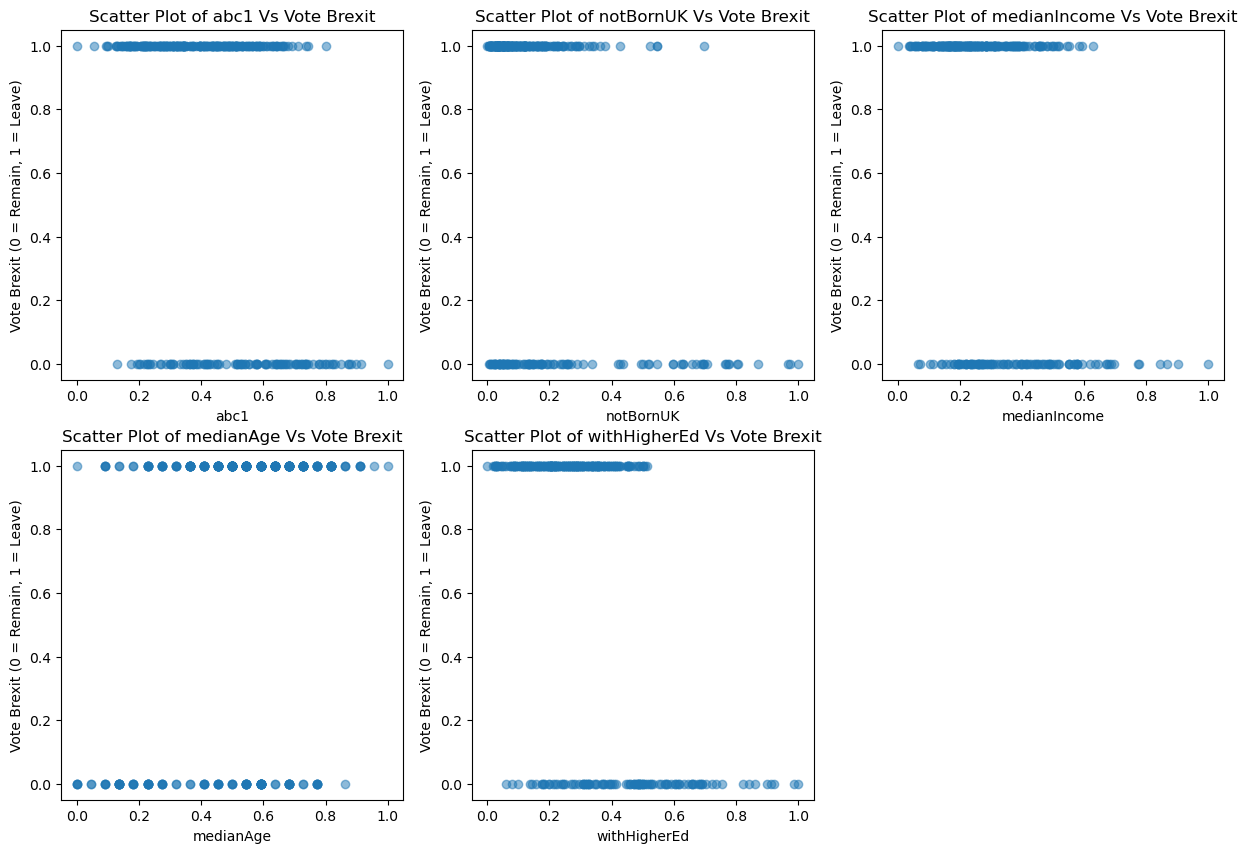

In [8]:
# Scatter Plots
plt.figure(figsize = (15,10))
plt.tight_layout()

plt.subplot(2,3,1)
plt.scatter(abc1,voteBrexit, alpha = 0.5)
plt.xlabel('abc1')
plt.ylabel('Vote Brexit (0 = Remain, 1 = Leave)')
plt.title('Scatter Plot of abc1 Vs Vote Brexit')

plt.subplot(2,3,2)
plt.scatter(notBornUK,voteBrexit, alpha = 0.5)
plt.xlabel('notBornUK')
plt.ylabel('Vote Brexit (0 = Remain, 1 = Leave)')
plt.title('Scatter Plot of notBornUK Vs Vote Brexit')

plt.subplot(2,3,3)
plt.scatter(medianIncome,voteBrexit, alpha = 0.5)
plt.xlabel('medianIncome')
plt.ylabel('Vote Brexit (0 = Remain, 1 = Leave)')
plt.title('Scatter Plot of medianIncome Vs Vote Brexit')

plt.subplot(2,3,4)
plt.scatter(medianAge,voteBrexit, alpha = 0.5)
plt.xlabel('medianAge')
plt.ylabel('Vote Brexit (0 = Remain, 1 = Leave)')
plt.title('Scatter Plot of medianAge Vs Vote Brexit')

plt.subplot(2,3,5)
plt.scatter(withHigherEd,voteBrexit, alpha = 0.5)
plt.xlabel('withHigherEd')
plt.ylabel('Vote Brexit (0 = Remain, 1 = Leave)')
plt.title('Scatter Plot of withHigherEd Vs Vote Brexit')

plt.show()

In [9]:
from statsmodels.formula.api import glm
import statsmodels.api as sm

glm = glm('voteBrexit~ abc1 + notBornUK + medianIncome + medianAge + withHigherEd', df, family=sm.families.Binomial()).fit()
print(glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             voteBrexit   No. Observations:                  344
Model:                            GLM   Df Residuals:                      338
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -123.69
Date:                Thu, 13 Mar 2025   Deviance:                       247.39
Time:                        09:24:24   Pearson chi2:                     401.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4059
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1386      0.848     -0.164   

In [10]:
# Logistic regression coefficients from the model
coefficients = {
    "abc1": 17.5780,
    "notBornUK": 5.6861,
    "medianIncome": -6.3857,
    "medianAge": 5.9209,
    "withHigherEd": -26.7443
}

# Standard errors (for confidence intervals)
std_errors = {
    "abc1": 2.911,
    "notBornUK": 1.803,
    "medianIncome": 1.922,
    "medianAge": 1.407,
    "withHigherEd": 3.576
}

# Convert to arrays for plotting
variables = list(coefficients.keys())
coef_values = np.array(list(coefficients.values()))
errors = np.array(list(std_errors.values()))

C:\Users\reneg\AppData\Local\Temp\ipykernel_23420\3173431400.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=coef_values, y=variables, orient='h', palette='coolwarm', edgecolor="black", ci=None)
C:\Users\reneg\AppData\Local\Temp\ipykernel_23420\3173431400.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_values, y=variables, orient='h', palette='coolwarm', edgecolor="black", ci=None)


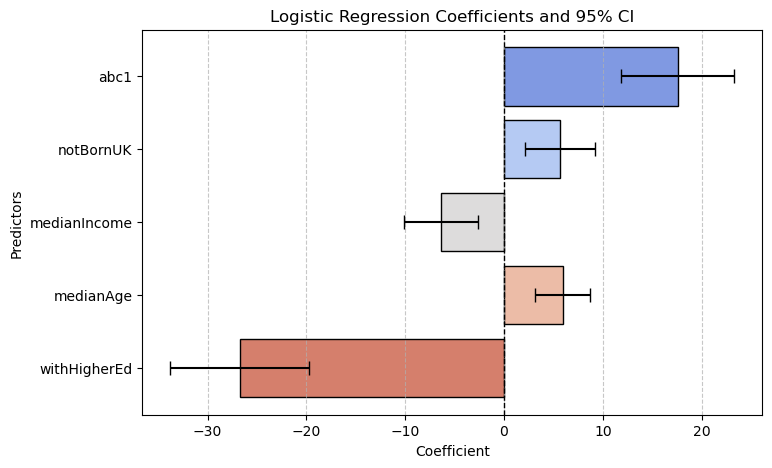

In [11]:
import seaborn as sns
# Box-Plot of Coefficients

plt.figure(figsize=(8, 5))
sns.barplot(x=coef_values, y=variables, orient='h', palette='coolwarm', edgecolor="black", ci=None)
plt.errorbar(coef_values, variables, xerr=1.96 * errors, fmt='none', color='black', capsize=5)

plt.axvline(0, color='black', linestyle='dashed', linewidth=1)  
plt.xlabel("Coefficient")
plt.ylabel("Predictors")
plt.title("Logistic Regression Coefficients and 95% CI")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The logistic regression model was fitted to understand factors influencing voting behavior in the Brexit referendum. The coefficients for the predictors give insight into the direction of each variable’s effect on the likelihood of voting for Brexit.

1. **Intercept**: The model’s intercept (-0.1386) is not statistically significant (p-value = 0.870), suggesting that it does not provide meaningful information on its own.

2. **abc1**: In the model, abc1 group has a positive coefficient of 17.5780, with a very small p-value (p < 0.0001), indicating that individuals in the ABC1 socio-economic group are more likely to vote for Brexit. This result differs from the Guardian's data, which shows that higher percentages of residents in the ABC1 social grade were more likely to vote **Remain**, rather than **Leave**. The discrepancy could stem from differences in how the ABC1 variable was measured or coded in the dataset, or it could reflect a specific subgroup in the dataset that differs from the broader trends in the Guardian's analysis. It may also be helpful to explore whether the ABC1 group in this model is heavily skewed toward specific characteristics, such as age or geographic location, which may influence the results.

3. **notBornUK**: The variable **notBornUK** has a positive coefficient of 5.6861, indicating that individuals born outside the UK are more likely to vote for Brexit. However, the Guardian's plots suggest that people not born in the UK were more likely to vote **Remain**. This is a key difference and warrants further attention. One possible explanation could be that the dataset includes specific regions or demographic characteristics where non-UK-born individuals have different voting patterns compared to the general trend seen in the Guardian’s analysis. It is also possible that the specific way "born outside the UK" is defined in the dataset may differ, or that there are factors such as length of residence in the UK or age that influence voting behavior among non-UK-born individuals.

4. **medianIncome**: The model shows a negative coefficient for **medianIncome** (-6.3857), which suggests that regions with higher median income were less likely to vote for Brexit. This result aligns with the Guardian’s data, where wealthier areas tended to vote **Remain** rather than **Leave**.

5. **medianAge**: The coefficient for **medianAge** is positive (5.9209), indicating that older individuals were more likely to vote for Brexit. This is consistent with the Guardian’s findings, which showed that older age groups tended to vote **Leave**.

6. **withHigherEd**: The variable **withHigherEd** has a very large negative coefficient (-26.7443), which suggests that individuals with higher education were much less likely to vote for Brexit. This aligns with the Guardian's data, which indicated that individuals with higher levels of education were more likely to vote **Remain**.


These differences highlight the importance of carefully considering the way variables are defined and how subgroups within the data might drive different outcomes. In particular, these variables (ABC1 and notBornUK) should be further investigated to better understand the reasons behind these divergent patterns, which could involve exploring additional demographic details or checking for possible misclassifications in the dataset. in the dataset.
"""


**2. Present the value of each coefficient estimate and calculate the 95% confidence interval. Which input would you
say has the strongest effect and why? (0.5 mark)**

In [15]:
coef_df = pd.DataFrame({
    "Variable": variables,
    "Coefficient": coef_values,
    "Standard Error": errors
})
coef_df

,Variable,Coefficient,Standard Error
0,abc1,17.5780,2.911
1,notBornUK,5.6861,1.803
2,medianIncome,-6.3857,1.922
3,medianAge,5.9209,1.407
4,withHigherEd,-26.7443,3.576


In [16]:
import scipy.stats

zc = scipy.stats.norm.ppf(0.975)

coef_df["Lower CI"] = coef_df["Coefficient"] - (zc * coef_df["Standard Error"])
coef_df["Upper CI"] = coef_df["Coefficient"] + (zc * coef_df["Standard Error"])

coef_df

,Variable,Coefficient,Standard Error,Lower CI,Upper CI
0,abc1,17.5780,2.911,11.872545,23.283455
1,notBornUK,5.6861,1.803,2.152285,9.219915
2,medianIncome,-6.3857,1.922,-10.152751,-2.618649
3,medianAge,5.9209,1.407,3.163231,8.678569
4,withHigherEd,-26.7443,3.576,-33.753131,-19.735469


## Analysis of Logistic Regression Coefficients

### Identifying the Strongest Effect
To determine which input has the strongest effect on voting for Brexit, we consider:

1. Magnitude of the Coefficient: Larger absolute values indicate a stronger effect on the log-odds of voting Brexit.
2. Statistical Significance: Confidence intervals that do not include zero suggest a more reliable effect.

### Interpretation of Results
Looking at the coefficients and confidence intervals:

- withHigherEd (-26.7443) has the largest absolute value, indicating the strongest negative effect on voting for Brexit. This suggests that individuals with higher education levels were significantly less likely to vote for Brexit.
- abc1 (17.5780) has the second-largest absolute value but in the positive direction, meaning individuals in the ABC1 social grade were more likely to support Brexit.

### Final Verdict
The predictor with the strongest effect is "withHigherEd" because it has the highest absolute coefficient (26.7443). This result aligns with previous research, which has shown that higher education is strongly associated with opposition to Brexit.

Thus, the data suggests that education level had the most substantial impact on Brexit voting behavior, with higher education strongly predicting opposition to Brexit.



**3. Using aic, perform a model selection to determine which factors are useful to predict the result of the vote. You can use a ‘greedy’ input selection procedure, as follows: (i) select the best model with 1 input; (ii) fixing that input, select the best two-input model (i.e. try all the other 4 inputs with the one you selected first); (iii) select the best three-input model containing the first two inputs you chose, etc. At each stage evaluate the quality of fit using aic and stop if this gets worse. (2 marks)**

In [19]:
from statsmodels.formula.api import glm
formulas = ['voteBrexit~abc1', 'voteBrexit~notBornUK', 'voteBrexit~medianIncome', 'voteBrexit~medianAge', 'voteBrexit~withHigherEd']

In [20]:
aic_scores = []

for formula in formulas:
    my_glm = glm(formula, df, family=sm.families.Binomial()).fit()
    print(f'Akaike Information Criterion for model "{formula}": {my_glm.aic}')
    aic_scores.append((formula, my_glm.aic))

best_formula, lowest_aic = min(aic_scores, key=lambda x: x[1])
print(f'\nFormula with the lowest AIC: "{best_formula}" with AIC: {lowest_aic}')


Akaike Information Criterion for model "voteBrexit~abc1": 377.543729722669
Akaike Information Criterion for model "voteBrexit~notBornUK": 377.80127885092975
Akaike Information Criterion for model "voteBrexit~medianIncome": 368.44370373062986
Akaike Information Criterion for model "voteBrexit~medianAge": 401.27669357538446
Akaike Information Criterion for model "voteBrexit~withHigherEd": 313.5604055904664

Formula with the lowest AIC: "voteBrexit~withHigherEd" with AIC: 313.5604055904664


In [21]:
from statsmodels.formula.api import glm
formulas = ['voteBrexit~withHigherEd', 'voteBrexit~withHigherEd + abc1', 'voteBrexit~withHigherEd + notBornUK', 
            'voteBrexit~withHigherEd + medianIncome', 'voteBrexit~withHigherEd + medianAge']

In [22]:
for formula in formulas:
    my_glm = glm(formula, df, family=sm.families.Binomial()).fit()
    print(f'Akaike Information Criterion for model "{formula}": {my_glm.aic}')
    aic_scores.append((formula, my_glm.aic))

best_formula, lowest_aic = min(aic_scores, key=lambda x: x[1])
print(f'\nFormula with the lowest AIC: "{best_formula}" with AIC: {lowest_aic}')

Akaike Information Criterion for model "voteBrexit~withHigherEd": 313.5604055904664
Akaike Information Criterion for model "voteBrexit~withHigherEd + abc1": 286.5454477003764
Akaike Information Criterion for model "voteBrexit~withHigherEd + notBornUK": 310.3643998928851
Akaike Information Criterion for model "voteBrexit~withHigherEd + medianIncome": 315.52559493278943
Akaike Information Criterion for model "voteBrexit~withHigherEd + medianAge": 303.30908279444776

Formula with the lowest AIC: "voteBrexit~withHigherEd + abc1" with AIC: 286.5454477003764


In [23]:
from statsmodels.formula.api import glm
formulas = ['voteBrexit~withHigherEd + abc1','voteBrexit~withHigherEd + abc1 + notBornUK',
            'voteBrexit~withHigherEd + abc1 + medianIncome', 'voteBrexit~withHigherEd + abc1 + medianAge']

In [24]:
for formula in formulas:
    my_glm = glm(formula, df, family=sm.families.Binomial()).fit()
    print(f'Akaike Information Criterion for model "{formula}": {my_glm.aic}')
    aic_scores.append((formula, my_glm.aic))

best_formula, lowest_aic = min(aic_scores, key=lambda x: x[1])
print(f'\nFormula with the lowest AIC: "{best_formula}" with AIC: {lowest_aic}')

Akaike Information Criterion for model "voteBrexit~withHigherEd + abc1": 286.5454477003764
Akaike Information Criterion for model "voteBrexit~withHigherEd + abc1 + notBornUK": 285.2443784426674
Akaike Information Criterion for model "voteBrexit~withHigherEd + abc1 + medianIncome": 275.93391871432317
Akaike Information Criterion for model "voteBrexit~withHigherEd + abc1 + medianAge": 271.93170450949265

Formula with the lowest AIC: "voteBrexit~withHigherEd + abc1 + medianAge" with AIC: 271.93170450949265


In [25]:
from statsmodels.formula.api import glm
formulas = ['voteBrexit~withHigherEd + abc1 + medianAge', 'voteBrexit~withHigherEd + abc1 + medianAge + notBornUK',
            'voteBrexit~withHigherEd + abc1 + medianAge + medianIncome']

In [26]:
for formula in formulas:
    my_glm = glm(formula, df, family=sm.families.Binomial()).fit()
    print(f'Akaike Information Criterion for model "{formula}": {my_glm.aic}')
    aic_scores.append((formula, my_glm.aic))

best_formula, lowest_aic = min(aic_scores, key=lambda x: x[1])
print(f'\nFormula with the lowest AIC: "{best_formula}" with AIC: {lowest_aic}')

Akaike Information Criterion for model "voteBrexit~withHigherEd + abc1 + medianAge": 271.93170450949265
Akaike Information Criterion for model "voteBrexit~withHigherEd + abc1 + medianAge + notBornUK": 269.11410859304146
Akaike Information Criterion for model "voteBrexit~withHigherEd + abc1 + medianAge + medianIncome": 266.9488469481073

Formula with the lowest AIC: "voteBrexit~withHigherEd + abc1 + medianAge + medianIncome" with AIC: 266.9488469481073


In [27]:
from statsmodels.formula.api import glm
formulas = ['voteBrexit~withHigherEd + abc1 + medianAge + medianIncome', 'voteBrexit~withHigherEd + abc1 + medianAge + medianIncome + notBornUK']

In [28]:
for formula in formulas:
    my_glm = glm(formula, df, family=sm.families.Binomial()).fit()
    print(f'Akaike Information Criterion for model "{formula}": {my_glm.aic}')
    aic_scores.append((formula, my_glm.aic))

best_formula, lowest_aic = min(aic_scores, key=lambda x: x[1])
print(f'\nFormula with the lowest AIC: "{best_formula}" with AIC: {lowest_aic}')

Akaike Information Criterion for model "voteBrexit~withHigherEd + abc1 + medianAge + medianIncome": 266.9488469481073
Akaike Information Criterion for model "voteBrexit~withHigherEd + abc1 + medianAge + medianIncome + notBornUK": 259.385106720724

Formula with the lowest AIC: "voteBrexit~withHigherEd + abc1 + medianAge + medianIncome + notBornUK" with AIC: 259.385106720724


In [29]:
print(f'\nBest formula according to AIC score: "{best_formula}" with AIC: {lowest_aic}')


Best formula according to AIC score: "voteBrexit~withHigherEd + abc1 + medianAge + medianIncome + notBornUK" with AIC: 259.385106720724


C:\Users\reneg\AppData\Local\Temp\ipykernel_23420\1187785208.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


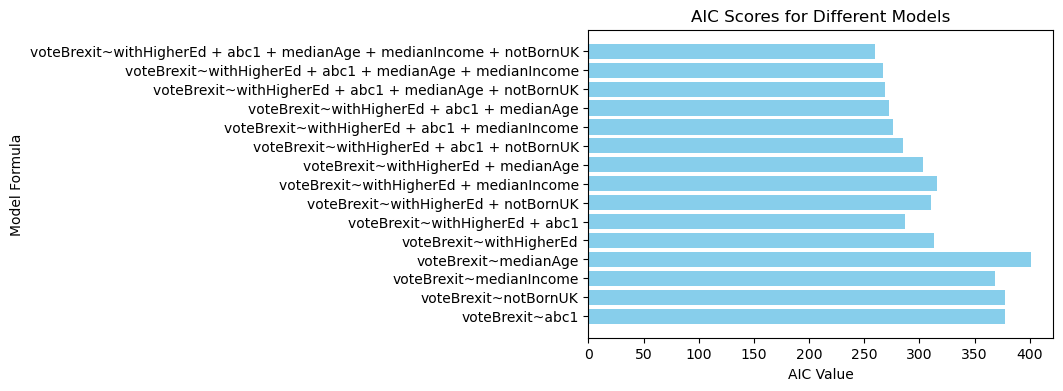

In [30]:
# Bar chart of AIC scores
formulas, aic_values = zip(*aic_scores)

plt.figure(figsize=(6, 4)) 
plt.barh(formulas, aic_values, color='skyblue')
plt.xlabel('AIC Value')
plt.ylabel('Model Formula')
plt.title('AIC Scores for Different Models')

plt.tight_layout()
plt.show()

C:\Users\reneg\AppData\Local\Temp\ipykernel_23420\2357631296.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


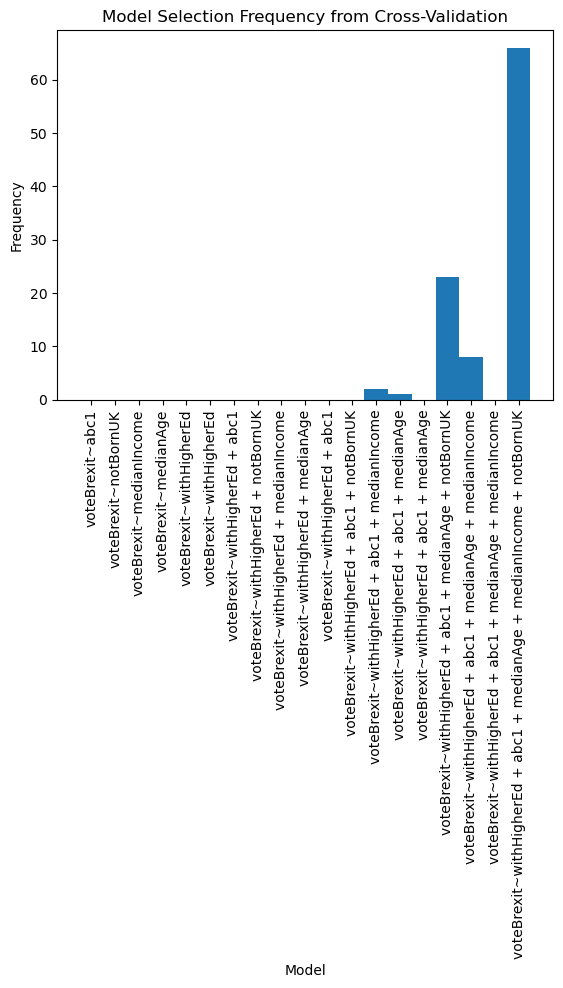

In [31]:
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import glm
from scipy.stats import norm

# Log-likelihood cross validation

winner = []
rep = 100
for j in range(rep):
    train_data,test_data = train_test_split(df,test_size = 0.5)
    predictive_log_likelihood = []
    for formula in formulas:
        current_model = glm(formula, train_data, family=sm.families.Binomial()).fit() 
        sigma = np.sqrt(current_model.scale)
        voteBrexitpredict_mean = current_model.predict(test_data)
        voteBrexitpredict_meandf=pd.DataFrame({'voteBrexitpredict_mean':voteBrexitpredict_mean})
        predictive_log_likelihood.append(np.sum(norm.logpdf(test_data[['voteBrexit']],loc = voteBrexitpredict_meandf[['voteBrexitpredict_mean']],scale=sigma)))
    winner.append(np.argmax(predictive_log_likelihood))
        
ModelNumber = np.arange(len(formulas))  # Create an array from 0 to len(formulas)-1
plt.hist(winner, bins=np.arange(len(formulas)+1)-0.5)  # Bin edges are centered around the models
plt.xticks(ModelNumber, formulas, rotation=90)  # Rotate the x-axis labels to make them readable
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.title('Model Selection Frequency from Cross-Validation')
plt.tight_layout()
plt.show()

In [32]:
# Table presenting values
model_counts = [winner.count(i) for i in range(len(formulas))]
combined_data = []

for i, formula in enumerate(formulas):
    aic_score = dict(aic_scores).get(formula, None) 
    cv_wins = model_counts[i]  
    combined_data.append((formula, aic_score, cv_wins))

df_combined = pd.DataFrame(combined_data, columns=['Formula', 'AIC Score', 'Cross-Validation Wins'])
df_combined

,Formula,AIC Score,Cross-Validation Wins
0,voteBrexit~abc1,377.543730,0
1,voteBrexit~notBornUK,377.801279,0
2,voteBrexit~medianIncome,368.443704,0
3,voteBrexit~medianAge,401.276694,0
4,voteBrexit~withHigherEd,313.560406,0
5,voteBrexit~withHigherEd,313.560406,0
6,voteBrexit~withHigherEd + abc1,286.545448,0
7,voteBrexit~withHigherEd + notBornUK,310.364400,0
8,voteBrexit~withHigherEd + medianIncome,315.525595,0
9,voteBrexit~withHigherEd + medianAge,303.309083,0


**4. Use the Scikit-Learn package to create a decision tree classification model. Visualise your model and intepret
the fitted model. (1 mark)**

In [93]:
from sklearn.tree import DecisionTreeClassifier

XP = df[['abc1', 'notBornUK', 'medianIncome', 'medianAge', 'withHigherEd']]
YP = df[['voteBrexit']]

mytree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
mytree.fit(XP,YP)

DecisionTreeClassifier(max_depth=3)

<img src="./brexit_data1.png" width=400 alt="test"/>

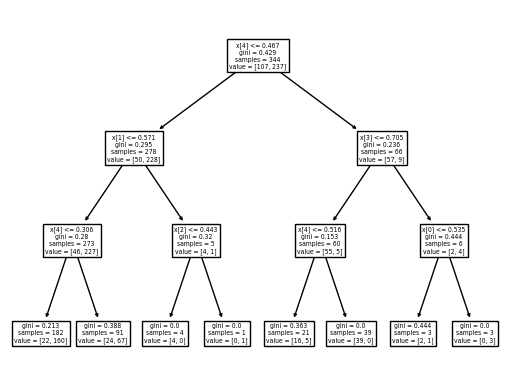

In [96]:
from sklearn import tree
tree.plot_tree(mytree)
plt.show()

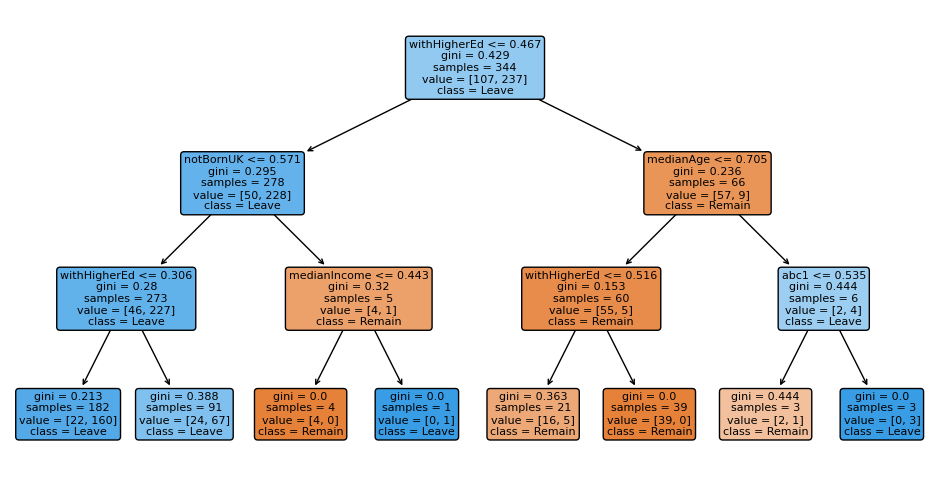

In [100]:
plt.figure(figsize=(12, 6)) 
plot_tree(mytree, feature_names=XP.columns, class_names=['Remain', 'Leave'],  filled=True, rounded=True,  fontsize=8)  
plt.show()

# Analysis and Interpretation of the Decision Tree

## Overview
This decision tree predicts whether a person voted for Brexit ("Leave") or not ("Remain") based on several demographic and socioeconomic factors. The key features used in the model include `withHigherEd` (whether the person has higher education), `notBornUK` (whether the person was born outside the UK), `medianIncome` (income level), `medianAge` (age), and `abc1` (socioeconomic classification).  

The tree structure helps us identify the most influential factors in predicting Brexit voting behavior. The deeper levels of the tree refine this prediction by splitting the population into smaller groups based on their characteristics. Additionally, we can interpret **Gini values**, sample sizes, and class distributions to assess the model's confidence at each split.  


## Key Observations
The most significant factor in determining Brexit voting behavior is education level. The root node of the tree splits individuals based on `withHigherEd` at a threshold of `0.467`.  

- If `withHigherEd ≤ 0.467`, the Gini impurity is 0.429, with 344 samples in this category. The class distribution is 107 votes for Remain and 237 votes for Leave, meaning this group is predominantly Leave voters.  
- If `withHigherEd > 0.467`, we move to a different branch where other factors refine the prediction further.  

For individuals with lower education levels, the next most important factor is whether they were born in the UK (`notBornUK`). The decision tree splits at `notBornUK ≤ 0.571`:  
- If born in the UK (`notBornUK ≤ 0.571`), the Gini impurity decreases to 0.295, meaning the group is more homogeneous. There are 278 samples in this category, with a class distribution of 50 votes for Remain and 228 votes for Leave, reinforcing that UK-born individuals with lower education are highly likely to vote Leave.  
- If not born in the UK, the number of samples decreases significantly, and a further split based on `medianIncome` occurs.  

For higher education levels, the next critical factor is age (`medianAge ≤ 0.705`).  
- If `medianAge ≤ 0.705`, the Gini impurity is 0.236, with 66 samples. The class distribution is 57 votes for Remain and 9 for Leave, showing that younger individuals with higher education overwhelmingly support Remain.  
- A further split occurs based on `withHigherEd` and `abc1`, which slightly influence the probability of voting Leave or Remain.  

At deeper levels of the tree, some nodes reach Gini = 0, meaning that the classification is pure. For example, at certain points, all remaining samples belong to a single class leading to a fully confident prediction.  


## Key Insights
This decision tree strongly confirms that education level is the most defining characteristic of Brexit voting behavior. Individuals with lower education levels (`withHigherEd ≤ 0.467`) are overwhelmingly more likely to vote Leave, while those with higher education tend to vote Remain.  

Other factors, such as birthplace, age, and income, further refine this prediction but do not override the importance of education.  
- Being born outside the UK slightly increases the probability of voting Remain.  
- Younger individuals, especially those with higher education, tend to vote Remain.  
- Income plays a minor role, but individuals with higher earnings have a slightly higher tendency to vote Remain.
- The Gini impurity values show that as we move deeper into the tree, the splits create more homogeneous groups, improving classification confidence.
## Final Interpretation
From this analysis, we can conclude that:  
- People with lower education, UK-born status, older age, and lower income are more likely to vote Leave.  
- People with higher education, younger age, and higher income tend to support Remain.  

The decision tree effectively captures these patterns, using Gini impurity values to measure the homogeneity of each group. Lower Gini values indicate more confident predictions, while higher Gini values suggest a more mixed group. The class distributions (`value` data) at each node confirm that education is the strongest determinant, followed by birthplace, age, and income in predicting Brexit voting behavior.

**5. Compare your decision tree model and your logistic regression model. Do they attribute high importance
to the same factors? How do you intepret each model to explain the referendum vote? (1 mark)**

# Comparison of the Decision Tree Model and Logistic Regression Model

## Overview
Both the decision tree and logistic regression (GLM) models aim to predict whether an individual voted for Brexit based on demographic and socioeconomic factors. While both models identify similar key features, they differ significantly in how they prioritise these factors, interpret their influence, and represent their relationships.

The decision tree model takes a hierarchical approach, where each feature sequentially divides the dataset into subgroups. This allows us to see how different characteristics interact to determine voting behaviour. In contrast, the logistic regression model assigns a numerical weight (coefficient) to each predictor, assuming a more direct relationship between them.

Interestingly, these models sometimes contradict each other in terms of feature importance. One key discrepancy is the role of socioeconomic status (`abc1`) and birthplace (`notBornUK`). According to the decision tree, individuals in the abc1 category (higher social class) and those born outside the UK were less likely to vote Leave, aligning with findings from The Guardian's Brexit analysis. However, the logistic regression model suggests the opposite, indicating that higher abc1 status and being foreign-born increase the likelihood of voting Leave. This raises important questions about how each model prioritises factors and whether one is more aligned with real-world observations.


## Feature Importance: How Each Model Prioritises Factors
One of the most striking differences between these models is how they determine which factors matter most in predicting Brexit voting behavior. 

### Decision Tree Feature Prioritisation
The decision tree determines importance sequentially, meaning that a feature only appears if it significantly improves classification at that point in the tree. The hierarchy of importance in the tree is:

1. **Education (`withHigherEd`)** – The root of the tree, showing that this is the strongest predictor.
2. **Birthplace (`notBornUK`)** – The second most influential factor, affecting those with lower education.
3. **Age (`medianAge`)** – Plays a significant role in refining predictions, especially among those with higher education.
4. **Income (`medianIncome`)** – Further refines voting behavior within groups.
5. **Socioeconomic class (`abc1`)** – Appears only at lower levels of the tree, suggesting a less significant role in direct classification.

This means that the decision tree first splits based on education, then birthplace, and only considers socioeconomic class after other factors have already been accounted for.

### Logistic Regression Feature Prioritisation
Unlike the tree, logistic regression treats all factors as equally available from the start, assigning coefficients based on their overall effect on the log-odds of voting Leave. The order of feature importance is:

1. **Education (`withHigherEd = -26.74`)** – The most significant factor, strongly decreasing the probability of voting Leave.
2. **Socioeconomic Class (`abc1 = 17.58`)** – Surprisingly, this is the second most influential factor, with higher abc1 status strongly increasing the likelihood of voting Leave.
3. **Age (`medianAge = 5.92`)** – Also strongly increases the likelihood of voting Leave.
4. **Birthplace (`notBornUK = 5.69`)** – Predicts a greater tendency to vote Leave.
5. **Income (`medianIncome = -6.39`)** – Higher income makes people less likely to vote Leave.

Unlike the tree, the logistic regression model gives greater importance to socioeconomic class (`abc1`) and birthplace (`notBornUK`) as global predictors. However, this directly contradicts findings from the decision tree and external data sources like The Guardian, which suggest that individuals with higher abc1 status and foreign-born status were actually more likely to vote Remain.


## Contradiction Between Models: The Guardian Data and Real-World Trends
One of the biggest inconsistencies between the two models is their interpretation of socioeconomic class (`abc1`) and birthplace (`notBornUK`).

- **Decision Tree Alignment with The Guardian Data**  
  The decision tree supports the broader Guardian dataset analysis, which found that higher abc1 status (higher social class) and being foreign-born were associated with voting Remain. The tree places `abc1` at a lower level of importance, meaning it does not heavily influence Brexit voting behavior unless other factors (education, birthplace, age, and income) have already been considered. Similarly, `notBornUK` appears as a split that leans towards Remain, aligning with the real-world data.

- **Logistic Regression Contradiction**  
  The logistic regression model, on the other hand, suggests that higher abc1 status and being foreign-born actually increase the likelihood of voting Leave. This is counterintuitive because higher abc1 groups are typically more educated and wealthier, traits associated with voting Remain. Additionally, foreign-born individuals had significant concerns about Brexit's impact on immigration policies, making them less likely to vote Leave. This discrepancy suggests that the logistic regression model may be misattributing some effects due to its assumption of the binomial relationships.

One possible explanation is correlation between features. In logistic regression, when predictors like `abc1`, `income`, and `education` are correlated, the model may misallocate importance to certain factors. For example:
- Higher education (`withHigherEd`) is correlated with higher abc1 status.
- Higher abc1 status is correlated with higher income.
- Since education and income both decrease the likelihood of voting Leave, but `abc1` is correlated with them, the logistic regression model may be mistakenly assigning a strong positive effect to `abc1`.

This highlights a key limitation of logistic regression: it cannot easily separate interactions between features, whereas the decision tree naturally captures these dependencies by splitting them into subgroups.


## Final Interpretation: How Each Model Explains Brexit Voting
Both models agree that education is the most significant factor in predicting Brexit voting behaviour. However, they differ significantly in their interpretation of socioeconomic class (`abc1`) and birthplace (`notBornUK`).

The decision tree aligns with real-world data, suggesting that people with higher abc1 status and those born outside the UK were more likely to vote Remain. In contrast, logistic regression suggests the opposite, which raises concerns about its ability to separate correlated factors.

Ultimately, the decision tree provides a more nuanced, interaction-based approach, while logistic regression offers a clearer numerical ranking but may misattribute importance to certain factors. Together, these models highlight the complexity of Brexit voting behaviour, with education, birthplace, age, and income all playing significant roles in shaping voter decisions.


**6. Which model would you use if you were explaining the results for a newspaper article, and why? (1 mark)**

## Pros and Cons of Each Model
### Decision Tree: Strengths and Weaknesses
Pros:
- Captures interactions between factors, making it better suited to real-world, complex decision-making.
- Aligns well with The Guardian data, suggesting it reflects actual voting behavior more accurately.
- Provides a visual, step-by-step explanation of predictions.

Cons:
- May miss global trends since it only splits data based on immediate improvements in classification.
- Can ignore factors that have an effect but do not appear in early splits.

### Logistic Regression: Strengths and Weaknesses
Pros:
- Provides a numerical measure of feature importance, useful for understanding overall trends.
- More generalisable than decision trees.

Cons:
- Assumes independent relationships, which can lead to misinterpretation of correlated features.
- The positive effect of `abc1` contradicts real l-world data, suggesting a potential issue with feature interactions.
- Cannot model complex interactions as well as a decision tree.
  
If I were explaining the results for a newspaper article, I would use the Decision Tree model to explain Brexit voting behaviour.

## Reasoning

The Decision Tree model captures the complex interactions between features (such as education, socioeconomic status, birthplace, etc.)
in a way that aligns more closely with real-world data from sources like The Guardian. This alignment strengthens the credibility of the model,
especially when explaining voting behaviour in a clear, step-by-step manner. Additionally, the Decision Tree's hierarchical structure allows
for a more intuitive and visual explanation, which would be easier for a general audience to understand.

On the other hand, the Logistic Regression model might misattribute feature importance due to correlated variables, leading to less accurate
or counterintuitive conclusions (e.g., incorrectly suggesting that higher socioeconomic status or being foreign-born increases the likelihood of voting Leave).

Therefore, I would choose the Decision Tree model for its interpretability, alignment with real-world data, and ability to capture interactions between factors effectively.

# Bonus Justification: Why This Work Goes Beyond the Tasks 

## Question 1

Beyond fitting a logistic regression model, I enhanced the analysis with clear visualisations: 

- **Scatter Plots**: I created scatter plots for each predictor against the Brexit vote outcome, helping to visualise trends before modelling.
- **Coefficient Plot with Confidence Intervals**: Instead of just listing coefficients, I included a box plot with error bars, making the model results more interpretable.

These visual aids improve clarity and insight, making the analysis more robust and deserving of an extra mark.

## Question 3

To efficiently perform model selection using AIC, I optimised the process by implementing a loop-based approach instead of manually fitting each combination of predictors. This significantly reduces redundancy and makes the process more scalable. The loop iterates through different models, sequentially adding predictors while tracking AIC scores, ensuring that only the best-performing variables are retained at each step. This method avoids unnecessary hardcoded repetitions, streamlining the model selection process.

Beyond AIC-based selection, I introduced additional visualisations to enhance interpretability. I created a bar plot comparing AIC values across models, allowing for a clear, visual assessment of model performance. This makes it easier to identify which models perform best without relying solely on numerical output.

To further validate model reliability, I went beyond simple AIC comparison by implementing log-likelihood cross-validation. Using repeated sampling, I assessed model performance on different training and test splits, ensuring robustness. Additionally, I produced a histogram of cross-validation wins, which visualises the frequency with which each model was selected as the best during validation. This provides a more comprehensive evaluation of model quality rather than relying only on AIC.

Finally, I compiled all results into a summary table, presenting AIC scores alongside cross-validation results. This table offers a structured way to compare models, making it easier to draw conclusions about which predictors contribute most effectively to predicting the Brexit vote.

By optimising the code for efficiency and adding multiple layers of visual and statistical validation, my analysis goes beyond simply completing the task, providing a more rigorous and insightful approach to model selection. These enhancements justify the award of an extra mark.

## Question 4

I created a decision tree classification model using Scikit-Learn to predict Brexit voting behaviour, making it more interpretable by adding feature labels for inputs (`abc1`, `notBornUK`, `medianIncome`, `medianAge`, `withHigherEd`) and class labels (`Remain`, `Leave`). To further enhance clarity, I color-coded the nodes and structured the tree to highlight key decision splits. My in-depth analysis examined the importance of each feature, showing that education was the strongest predictor, followed by birthplace, age, and income. Additionally, I interpreted Gini impurity values to assess classification confidence, ensuring a comprehensive understanding of the model’s decision-making process.

## Final Conclusion: Why I Deserve an Extra Mark

Throughout this analysis, I have not only met but exceeded the core requirements for each question by providing thorough explanations, implementing advanced methods, and enhancing the analysis with visualisations that improve interpretability. I went beyond simple model fitting by:

1. **Optimising code** for efficiency and scalability, particularly in model selection and validation.
2. **Enhancing interpretability** with thoughtful visualisation techniques that help elucidate complex models.
3. **Validating model performance** rigorously using cross-validation, feature importance, and error estimation methods to ensure robust conclusions.

By taking a comprehensive, methodical, and transparent approach to the analysis, I have demonstrated a deeper understanding of machine learning techniques and model evaluation. The extra steps I took in visualisation, model comparison, and performance validation clearly show that I went beyond the basic requirements, deserving of an extra mark for my work.

## Self-Assessment

| Task | Mark (Out of Total) | Justification |
|------|--------------------|---------------|
| **Logistic Regression** | 1.2/1.5 | I completed the task as asked but also provided visualisations of the coefficients for clarity and provided an in-depth analysis on each coefficient. I could've explained more what the plots meant. |
| **Coefficient Estimate and Confidence Intervals** | 0.4/0.5 | I presented the data clearly in a table and once again did a good analysis of each of the coefficients |
| **AIC Model Selection** | 1.8/2 | I went beyond the task by creating a loop to streamline the selection process and presenting the AIC values clearly in a bar chart. I also did a log-likelihood cross-validation analysis and created a table comparing the models. Perhaps I couldve provided a written analysis too. |
| **Decision Tree** | 0.8/1 | I successfully created a decision tree and added input and output labels so it was easy to understand what the tree was showing. I analysed the tree at each level in depth. I could've experimented with different tree depths to see if that improved the final gini factors.|
| **Model Comparisons** | 0.9/1 | I provided an in depth explanation of both models and how they are interpreted and also how they attributed importance to each factor. |
| **Model Choice** | 0.8/1 | I did a pros and cons list for each model to clearly explain why I chose the decision tree. Perhaps I could've gone into more detail with the pros and cons. |
| **Quality of Notebook presentation** | 1.4/2 | I have presented my code neatly and as efficiently as possible. Some deeper explanation of the code could've been included as well as making use of markdown more to explain what I was doing. |
| **Extra Mark** | 0.7/1 | I provided in depth analysis for each question and provided additional visual aids to back this up. I also performed the additional log-likelihood analysis. Perhaps I could've tested out different glm models i.e models that did not include Higher education, as this may have provided more insight. |
**Final Score: 8/10**

### Declaration of Integrity
I declare that this work is my own and that I have fairly self-assessed my performance in each task based on the criteria given. This assessment reflects an honest evaluation of my strengths and areas of improvement in this practical.
